# Machine Learning Kepler Exoplanet candidates


## Data

This notebook uses the Kepler space observations dataset.

In [1]:
import yellowbrick as yb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('max_columns', None)

df = pd.read_csv("cumulative.csv")

X = (df.iloc[:, 5:].assign(koi_pdisposition=(df.koi_pdisposition == "CANDIDATE").astype(int)).drop(columns=['koi_tce_delivname']))
y = df.koi_disposition == "CONFIRMED"

df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


## Visualizations

### Rank1D

This plots a simple bar chart in one dimension ranking the data according to some statistic, hence the name. The name is a misnomer for now, however, as though the method provides an `algorithm` field the only algorithm that works at the moment is the Shapiro-Wilk test, a statistical test (with a confidence score on the $[0, 1]$ scale) of whether or not the given feature is normally distributed. The Shapiro-Wilk is a useful tool for visualizations because it lets you test normality of variables using a single test statistic, e.g. without relying on a huge list of plots. Much less cumbersome. For more on the test, [the Wikipedia article](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) is informative. 

Here's what you get:

C:\Users\Richard\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


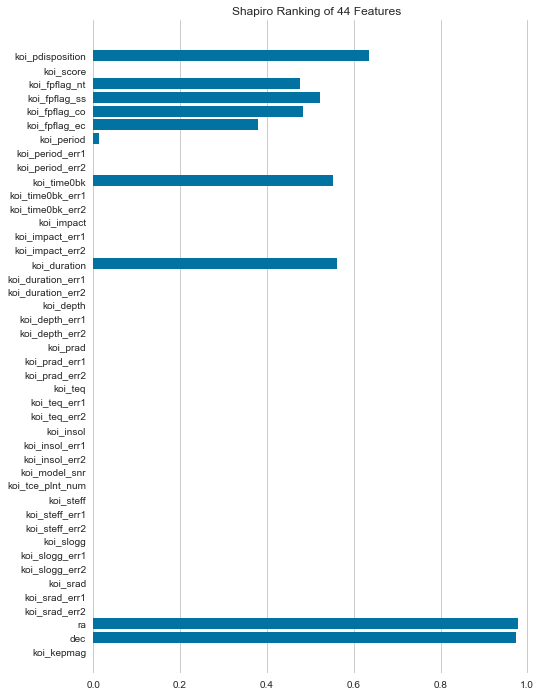

<AxesSubplot:title={'center':'Shapiro Ranking of 44 Features'}>

In [2]:
from yellowbrick.features import Rank1D

fig, ax = plt.subplots(1, figsize=(8, 12))
vzr = Rank1D(ax=ax)
vzr.fit(X, y)
vzr.transform(X)
sns.despine(left=True, bottom=True)
vzr.poof()

This is the output of a statistical test, but since we're not making any decisions based on it there's no need to choose a specific level of significance ($p$ value). You can see that `ra` and `dec` are very normally distributed ($p = 0.05$). The rest of the values are not normally distributed. Note that those flag values, which may only be 0 or 1, are scoring between 0.5 and 0.6 according to this metric! Semi-interesting.


## Rank2D

Rank2D implements a `seaborn` heatmap with some good defaults. Where `Rank1D` relies on one-dimensional metrics, `Rank2D` provides a facility for two-dimensional metrics, e.g. things like correlation, covariance, and so on.

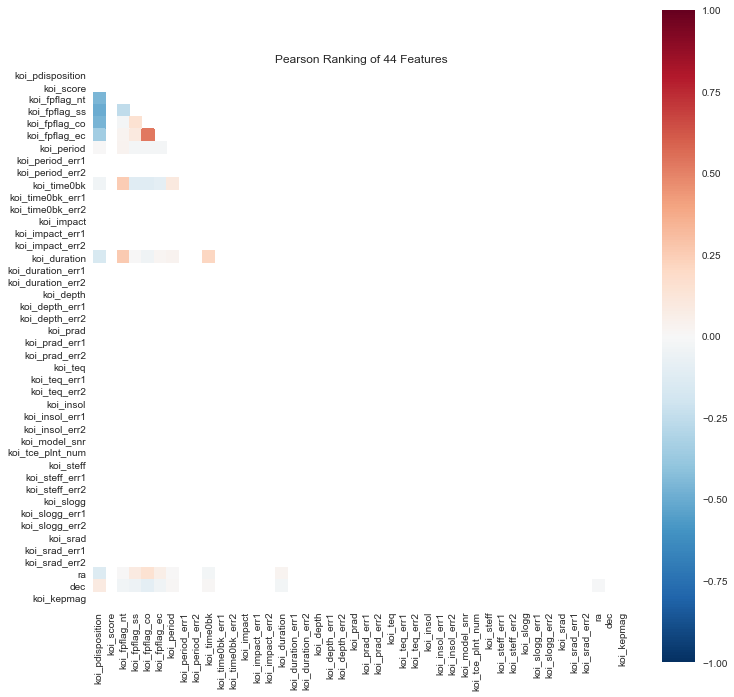

<AxesSubplot:title={'center':'Pearson Ranking of 44 Features'}>

In [3]:
from yellowbrick.features import Rank2D

fig, ax = plt.subplots(1, figsize=(12, 12))
vzr = Rank2D(ax=ax)
vzr.fit(X, y)
vzr.transform(X)
sns.despine(left=True, bottom=True)
vzr.poof()

Again the API is super-limiting, with only `covariance` and `pearson` options. There are lots more useful metrics that could be implemented; Spearmen's correlation, for example 

## Parallel Coordinates

Parallel coordinates are a lovely plot type. Given an input of normalized data, parallel coordinate plotting will lay out the feature space and plot out where each point falls on it.

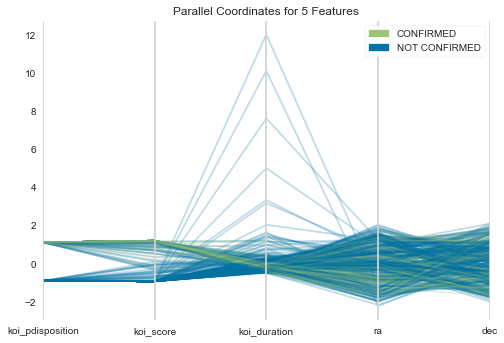

<AxesSubplot:title={'center':'Parallel Coordinates for 5 Features'}>

In [4]:
from yellowbrick.features import ParallelCoordinates
from sklearn.preprocessing import StandardScaler

# Select a handful of relevant columns and drop nulls.
np.random.seed()
cols = ['koi_pdisposition', 'koi_score', 'koi_duration', 'ra', 'dec']
X_sample = X.sample(500).loc[:, cols].dropna()
y_sample = y.iloc[X_sample.index.values].reset_index(drop=True)

# Normalize all of the fields.
trans = StandardScaler()
trans.fit(X_sample)
X_sample = pd.DataFrame(trans.transform(X_sample), columns=cols)

# Fit the chart.
# fig, ax = plt.subplots(1, figsize=(12, 6))
kwargs = {'vlines_kwds': {'color': 'lightgray'}}
vzr = ParallelCoordinates(classes=['NOT CONFIRMED', 'CONFIRMED'], **kwargs)  # ax=ax
vzr.fit(X_sample, y_sample)
vzr.transform(X_sample)
sns.despine(left=True, bottom=True)

# Display.
vzr.poof()

We see a few different interesting effects here. For one there's a long push of outliers of observation durations, all of which correspond with observations that were `NOT CONFIRMED`. That seems significant. Also, we can see that the probability that Kepler assigns to planets that get `CONFIRMED` (`koi_score`) is quite high, but not always 100 percent (in interpreting this fact, recall that this feature is scaled to fall between $[-1, 1]$).

Parallel coordinates plots are overall a very useful chart type, though not one without weaknesses. It's great to have a neat interface to it like this. But it's worth pointing out that this plot type is just reimplementing a `pandas.plotting` built-in). Meanwhile another related albeit less interpretable `pandas.plotting` built-in, the Andrews curve, is missing.



### RadViz

`RadViz` is another re-packaged `pandas.plotting` built-in. This visualization type lays out the features of the dataset in a circle, then plots the position of each point under consideration in that circle by pushing it towards the variables it loads heavily in. This is also sometimes called the "spring layout". It can be quite useful for visualizing distinguishabile attributes between class clusters; I find it to be a very understandable way of explaining which $n$ variables a particular class loads heavily on, when $n$ is greater than 2.

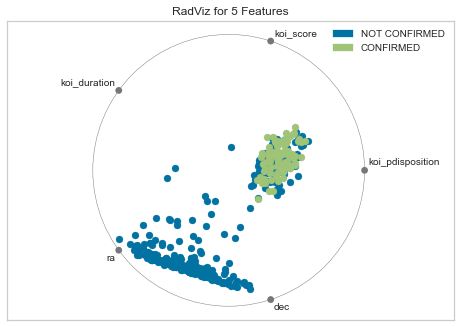

<AxesSubplot:title={'center':'RadViz for 5 Features'}>

In [5]:
from yellowbrick.features import RadViz

# fig, ax = plt.subplots(1, figsize=(12, 6))
# cmap = y_sample.map(lambda v: "steelblue" if v else "lightgray")
vzr = RadViz(classes=['NOT CONFIRMED', 'CONFIRMED'])
vzr.fit_transform(X_sample, y_sample)
vzr.poof()

This chart only tells us that planets that got confirmed loaded heavily in the pre-disposition, which is something we probably already figured.

### PCADecomposition

PCA, or Principal Components Analysis, is a dimensionality reduction technique which lets us drop the number of variables under consideration to some user-specified subset thereof. PCA works by finding the "natural directions" in a dataset, e.g. calculating new synthetic feature observations along the dataset axes that cover the most variance in the dataset, and hence, are the most "interesting". Note that PCA is an unsupervised algorithm that does not consider labels we assign to the data (e.g. classes). 

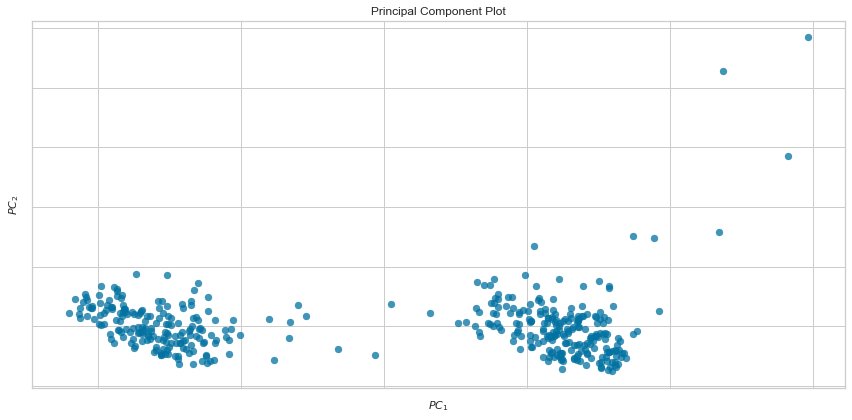

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [19]:
from yellowbrick.features import PCADecomposition

fig, ax = plt.subplots(1, figsize=(12, 6))
cmap = y_sample.map(lambda v: "steelblue" if v else "lightgray")
vzr = PCADecomposition(color=cmap)
vzr.fit_transform(X_sample)
vzr.poof()

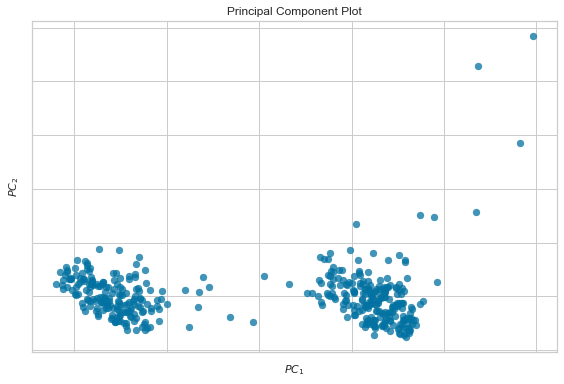

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [16]:
from yellowbrick.features import PCADecomposition
vzr = PCADecomposition(proj_dim=3)
vzr.fit_transform(X_sample)
vzr.poof()

These 2-d and 3-d scatter plots are good for probing how difficult a classification or regression problem will be. Here we see that the observations naturally cluster into two groups, but that the relative distribution of the class of interest *within* that group doesn't differ between them. If we move on to examining what it is about the data that is creating these quite separable structures, we will make great gains in understanding what the underlying data describes.

There is more that can be done with PCA than this, though. This library needs more options!

### Feature Importances

Feature importance is the relative usefulness of a given feature for performing a classification or regression task. The `FeatureImportances` chart type takes advantage of the exploratory power of decision tree algorithms, which provide a `feature_importance_` result once fitted, to plot this information directly. 

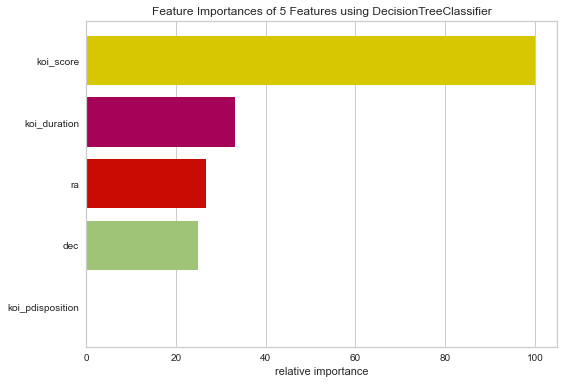

<AxesSubplot:title={'center':'Feature Importances of 5 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [17]:
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.features import FeatureImportances

clf = DecisionTreeClassifier()
viz = FeatureImportances(clf)
viz.fit(X_sample, y_sample)
viz.poof()